## **Liver Disease Clinical Assessment System**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [9]:
import sklearn
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

NumPy: 2.4.2
Pandas: 3.0.0
Scikit-learn: 1.8.0


In [ ]:
df = pd.read_csv("data/Liver_Patient_Dataset.csv", encoding="latin1")
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [30]:
df.head(20)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
7,29.0,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1
10,57.0,1,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1


In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  str    
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), int64(1), s

In [12]:
# Checking missing Values
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [15]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Samples: {df.shape[0]}\n")


Dataset Shape: (27158, 11)
Number of Features: 11
Number of Samples: 27158



In [16]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age of the patient,27158.0,44.125046,15.971563,4.0,33.0,45.0,55.0,90.0
Total Bilirubin,27158.0,3.407909,6.332486,0.4,0.8,1.0,2.7,75.0
Direct Bilirubin,27158.0,1.541630,2.895084,0.1,0.2,0.3,1.3,19.7
Alkphos Alkaline Phosphotase,27158.0,290.142021,239.595473,63.0,175.0,209.0,298.0,2110.0
Sgpt Alamine Aminotransferase,27158.0,81.279292,181.571537,10.0,23.0,36.0,62.0,2000.0
Sgot Aspartate Aminotransferase,27158.0,112.102879,283.616005,10.0,26.0,42.0,88.0,4929.0
Total Protiens,27158.0,6.472605,1.081477,2.7,5.8,6.6,7.2,9.6
ALB Albumin,27158.0,3.124044,0.792329,0.9,2.6,3.1,3.7,5.5
A/G Ratio Albumin and Globulin Ratio,27158.0,0.943567,0.324205,0.3,0.7,0.9,1.1,2.8
Result,27158.0,1.282790,0.450363,1.0,1.0,1.0,2.0,2.0


In [17]:
# Target variable distribution
print("\nTARGET VARIABLE DISTRIBUTION:")
print(df['Result'].value_counts())
print(f"\nLiver Disease (1): {df['Result'].value_counts()[1] / len(df) * 100:.2f}%")
print(f"No Liver Disease (2): {df['Result'].value_counts()[2] / len(df) * 100:.2f}%")


TARGET VARIABLE DISTRIBUTION:
Result
1    19478
2     7680
Name: count, dtype: int64

Liver Disease (1): 71.72%
No Liver Disease (2): 28.28%


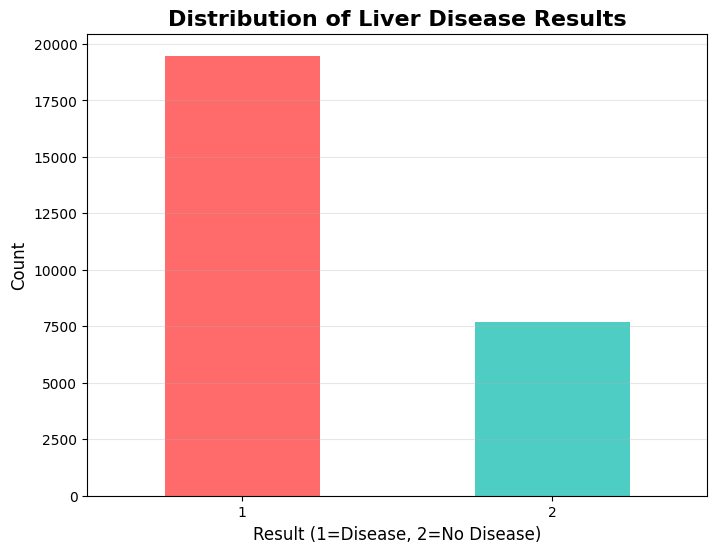

In [18]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
colors = ['#FF6B6B', '#4ECDC4']
df['Result'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Liver Disease Results', fontsize=16, fontweight='bold')
plt.xlabel('Result (1=Disease, 2=No Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [19]:
# Encode categorical variables
le = LabelEncoder()
df['Gender of the patient'] = le.fit_transform(df['Gender of the patient'])
# Male: 1, Female: 0

In [20]:
# Prepare features and target
X = df.drop('Result', axis=1)
y = df['Result']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
print("\nTRAIN-TEST SPLIT:")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


TRAIN-TEST SPLIT:
Training set size: (21726, 10)
Testing set size: (5432, 10)


## **Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:

#Gradient Boosting
gb= GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [25]:
# Predict
Y_pred_gb = gb.predict(X_test)

In [26]:
acc_gb = accuracy_score(y_test, Y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)

Gradient Boosting Accuracy: 0.8915684830633285


In [27]:
# Classification Report
print(classification_report(y_test, Y_pred_gb))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93      3900
           2       0.93      0.66      0.77      1532

    accuracy                           0.89      5432
   macro avg       0.91      0.82      0.85      5432
weighted avg       0.90      0.89      0.89      5432



## **Save model & scaler**

In [28]:
import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(gb, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
